# K-means clustering to group mall customers

### Environment Set Up

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Inspect the first few rows
print(df.head())  # First 5 rows
print(df.info())  # Data types and missing values

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### Data Preprocessing

In [4]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Drop 'CustomerID' as it's not needed for clustering
df = df.drop(['CustomerID'], axis=1)

In [6]:
# Convert categorical data (e.g., 'Gender') to numerical format if necessary
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
# Check for missing values again after transformation
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Cluster Selection

C:\Users\Aashman\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Aashman\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_

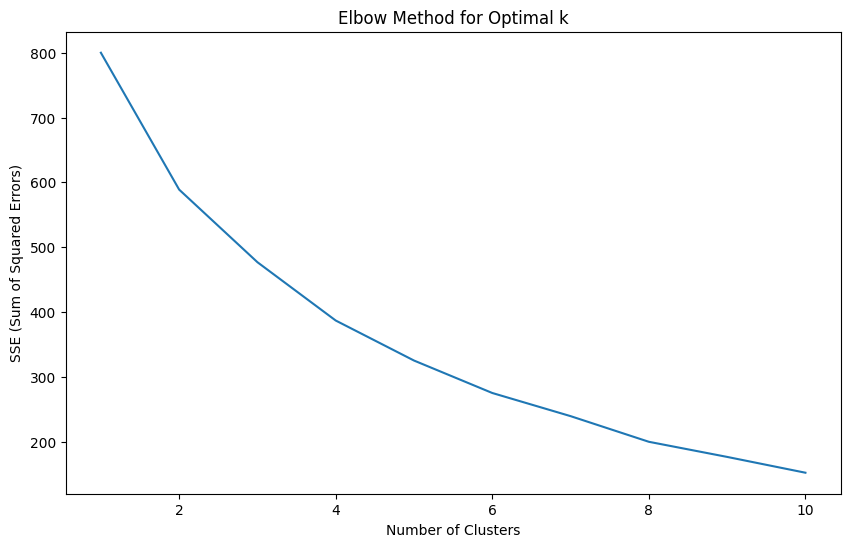

In [9]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()


### Apply K-means Clustering

In [10]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

### Visualize

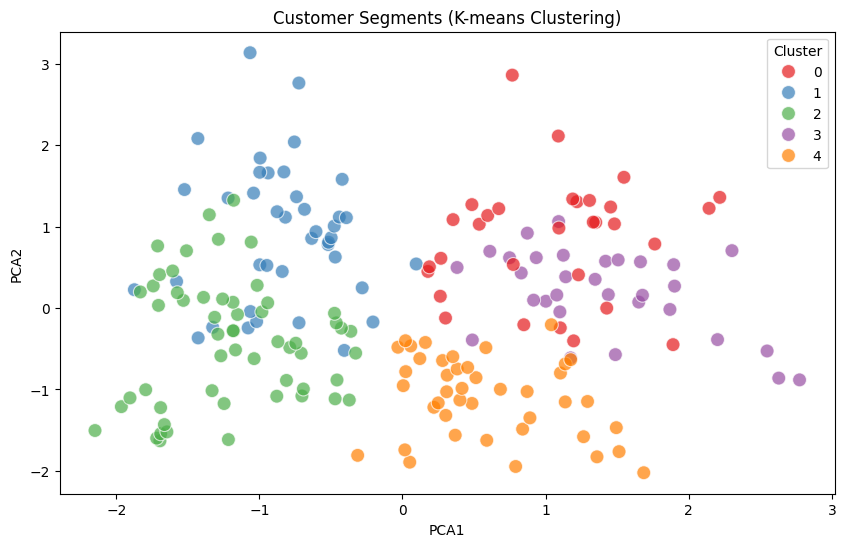

In [11]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=pca_df, s=100, alpha=0.7)
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### Analyze the Clusters

In [12]:
# Group by clusters and calculate mean values
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.451613  40.419355           90.000000               15.741935
1        0.000000  28.250000           62.000000               71.675000
2        1.000000  28.392857           60.428571               68.178571
3        0.000000  55.903226           48.774194               38.806452
4        1.000000  49.142857           46.333333               39.619048
